**Latihan SKLearn SVR**

**Tujuan** <br>
Setelah mengenal *support vector regression*, kita akan belajar menerapkan teknik tersebut ke dalam model ML dengan *library SKLearn*. 

**Tahap Latihan** <br>
Tahapan pada latihan kali ini adalah sebagai berikut:

1. Ubah data menjadi Dataframe.
2. Pisahkan atribut dan label.
3. Latih model SVR.
4. Buat plot dari model.

Dataset yang akan kita gunakan adalah data tentang lama kerja seseorang dan gajinya. Dataset ini dapat diunduh pada [tautan](https://www.kaggle.com/karthickveerakumar/salary-data-simple-linear-regression) berikut.

In [1]:
import pandas as pd

# Membaca datasets dan mengubahnya menjadi dataframe
data = pd.read_csv("./resources/sample_data/Salary_Data.csv")

Selanjutnya kita bisa melihat apakah terdapat missing value pada dataset dengan fungsi .info(). Keluaran dari cell di bawah menunjukkan bahwa tidak ada missing value pada dataset.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


Selanjutnya kita tampilkan 5 baris pertama dari dataframe.

In [3]:
data.rename(columns={"YearsExperience": "year_experience", 'Salary': 'salary'}, inplace=True)
data.head()

,year_experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Kemudian kita pisahkan antara atribut dan label yang ingin diprediksi. Ketika hanya terdapat satu atribut pada dataframe, maka atribut tersebut perlu diubah bentuknya agar bisa diterima oleh model dari library SKLearn. Untuk mengubah bentuk atribut kita membutuhkan library numpy.

In [4]:
import numpy as np

# memisahkan atribut dan label
X = data['year_experience']
y = data['salary']

# Mengubah bentuk atribut
X = np.array(X)
X = X[:,np.newaxis] # Mengubah array 1D menjadi 2D

Berikutnya kita buat objek support vector regression dan di sini kita akan mencoba menggunakan parameter C = 1000, gamma = 0.05, dan kernel ‘rbf’. Setelah model dibuat kita akan melatih model dengan fungsi fit pada data.

In [5]:
from sklearn.svm import SVR

# Membangu model
model = SVR(C=1000, gamma=0.05, kernel='rbf')

# Melatih model
model.fit(X, y)

SVR(C=1000, gamma=0.05)

Terakhir kita bisa memvisualisasikan bagaimana model SVR kita menyesuaikan terhadap pola yang terdapat pada data menggunakan library matplotlib.

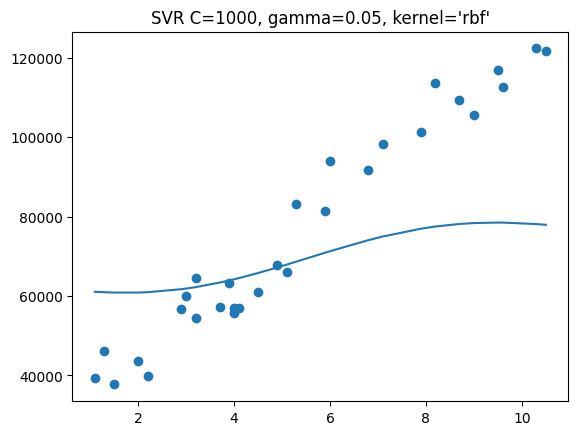

In [6]:
import matplotlib.pyplot as plt

# memvisualisasikan model
plt.scatter(X, y)
plt.title("SVR C=1000, gamma=0.05, kernel='rbf'")
plt.plot(X, model.predict(X))

Hasil visualisasi menunjukkan bahwa model yang kita kembangkan, belum mampu menyesuaikan terhadap pola pada data dengan baik. Nah, pada modul berikutnya kita akan mencoba meningkatkan performa model kita dengan menggunakan grid search.